# Data Description

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. 

As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that.

# Import Required Library

In [309]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [310]:
#importing dataset from github

df_train=pd.read_excel(r'C:\Users\booba\Downloads\Final_Train.xlsx')
df_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [311]:
df_test=pd.read_excel(r'C:\Users\booba\Downloads\Final_Test.xlsx')
df_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


This is not a CSV file - It is an excel type and we pulled only train data to build the model.

In [312]:
df_train.dtypes

Qualification         object
Experience             int64
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
dtype: object

We have 7 columns in the dataset and out of 12 we have a 5 columns in object so we will label encoded in upcoming step.

In [313]:
df_test.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
dtype: object

In [314]:
print(df_train.shape)
print(df_test.shape)

(5961, 7)
(1987, 6)


We have a 5961 rows and 7 columns in the train dataset and We have a 1987 rows and 6 columns in the test dataset.

In [315]:
print(df_train.isnull().sum())

print(df_test.isnull().sum())

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64
Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64


Based on the above info - we have a null value in the three columns which is Rating, Place and Miscellaneous_info in each dataset.

# Missing Value Treatment:

In [316]:
df_train["Place"].fillna("No_Detail,No_Detail",inplace=True)
df_train["Place"] = df_train["Place"].str.split(",")
df_train["City"] = df_train["Place"].str[-1]
df_train["Place"] = df_train["Place"].str[0]
df_test["Place"].fillna("No_Detail,No_Detail",inplace=True)
df_test["Place"] = df_test["Place"].str.split(",")
df_test["City"] = df_test["Place"].str[-1]
df_test["Place"] = df_test["Place"].str[0]

I have created the new column in the dataset which is city becasue in the place column we have city info too. Hence, I have created the new column as city.

In [317]:
#checkig the new columns data
print(df_train['City'].value_counts())
print(df_test['City'].value_counts())

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
No_Detail                25
e                         1
Name: City, dtype: int64
 Bangalore             420
 Delhi                 417
 Mumbai                389
 Hyderabad             333
 Chennai               287
 Coimbatore             70
 Ernakulam              48
 Thiruvananthapuram     17
No_Detail                6
Name: City, dtype: int64


Here, I can see the "e" as a city name but i think it is typo error or missed data. So, I dicided to change the Ernakulam because it is start with E and there is chance to have this city more. Hence, I am doing this.

In [318]:
df_train["City"]=df_train["City"].replace("e"," Ernakulam")
df_train["Profile"]=df_train["Profile"].replace("e"," Ernakulam")

I choosed profile column too because city column is part of the profile column. Hence I choosed and done the changes. Let check the unique vaue in the column again

In [319]:
df_train['City'].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              154
 Thiruvananthapuram      86
No_Detail                25
Name: City, dtype: int64

In [320]:
df_train["Rating"].fillna("0%",inplace=True)
df_train["Rating"] = df_train["Rating"].str[:-1].astype("int")
df_test["Rating"].fillna("0%",inplace=True)
df_test["Rating"] = df_test["Rating"].str[:-1].astype("int")

From the Rating column - We have a null value So I filled with 0% becasue we don't have data and the same time we can't go with estimation. It will affect the accuracy.

Also, changed the type as int and created bin for this rating column

In [321]:
df1=df_train.drop('Miscellaneous_Info',axis=1)
df2=df_test.drop('Miscellaneous_Info',axis=1)

I have dropped the above column becasue the reason i feel is it contain the conbination of rating & profile column. Hence, I decided to drop this column from the dataset.

In [322]:
print(df1.isnull().sum())
print(df2.isnull().sum())

Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
Fees             0
City             0
dtype: int64
Qualification    0
Experience       0
Rating           0
Place            0
Profile          0
City             0
dtype: int64


Based on the above info - We don't have a null value in the dataset. However, we will visualize and see the output through heatmap in the next step

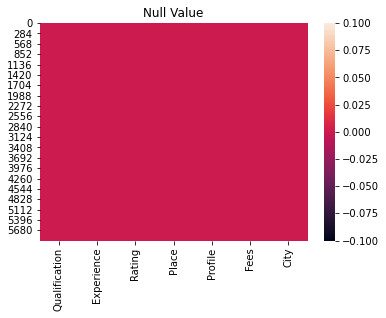

In [323]:
sns.heatmap(df1.isnull())
plt.title("Null Value")
plt.show()

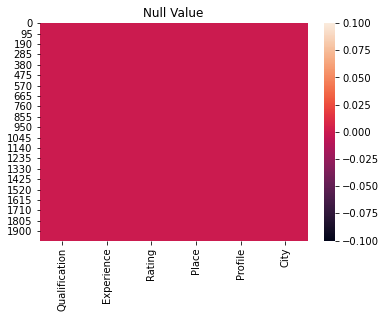

In [324]:
sns.heatmap(df2.isnull())
plt.title("Null Value")
plt.show()

# Visualization On The Data

Checking the distribution of the continuous value of the float type column

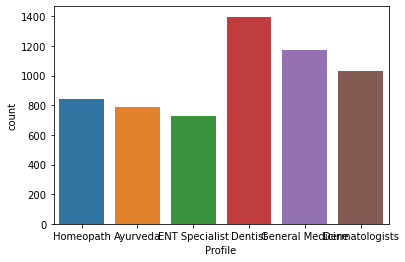

In [325]:
A=sns.countplot(x="Profile",data=df1)

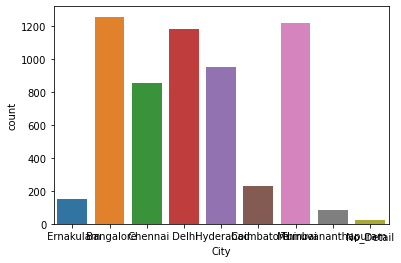

In [326]:
B=sns.countplot(x="City",data=df1)

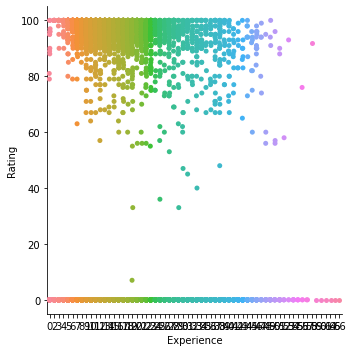

In [327]:
C=sns.catplot(x="Experience",y="Rating",data=df1)

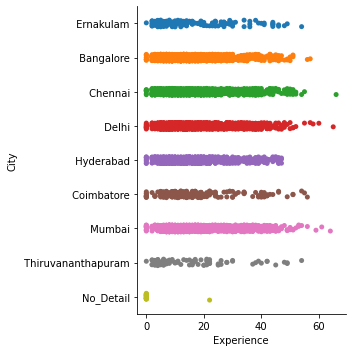

In [328]:
C=sns.catplot(x="Experience",y="City",data=df1)

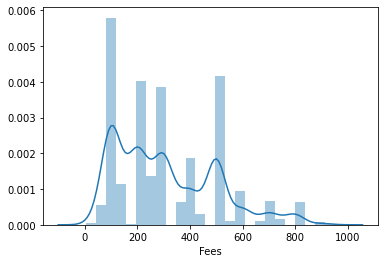

In [329]:
B=sns.distplot(df1["Fees"],kde=True)

# Encoding Method of DataFrame

In [330]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtypes=="object":
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
df1.head()

,Qualification,Experience,Rating,Place,Profile,Fees,City
0,401.0,24,100,296.0,5.0,100,4.0
1,73.0,12,98,856.0,0.0,350,0.0
2,1135.0,9,0,452.0,3.0,300,0.0
3,464.0,12,0,68.0,0.0,250,0.0
4,10.0,20,100,335.0,0.0,250,1.0


In [331]:
for i in df2.columns:
    if df2[i].dtypes=="object":
        df2[i]=OE.fit_transform(df2[i].values.reshape(-1,1))
df2.head()

,Qualification,Experience,Rating,Place,Profile,City
0,241.0,28.0,0,142.0,4.0,6.0
1,340.0,24.0,0,578.0,3.0,5.0
2,258.0,34.0,70,212.0,2.0,1.0
3,6.0,0.0,0,373.0,0.0,3.0
4,79.0,7.0,100,231.0,1.0,0.0


We have done the encoded in the dataset. We can use this for further step

In [332]:
df1=df1[["Qualification","Experience","Rating","Place","Profile","City","Fees"]]
df2=df2[["Qualification","Experience","Rating","Place","Profile","City"]]

# Describe Dataset

In [333]:
#Statistical Summary
df1.describe()

,Qualification,Experience,Rating,Place,Profile,City,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,17.303976,42.217245,411.772857,2.441872,3.078846,307.944640
std,413.842446,11.142798,47.340934,255.423921,1.658014,2.312170,190.920373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,219.000000,9.000000,0.000000,195.000000,1.000000,1.000000,150.000000
50%,596.000000,14.000000,0.000000,409.000000,2.000000,3.000000,300.000000
75%,943.000000,23.000000,96.000000,623.000000,4.000000,5.000000,500.000000
max,1419.000000,66.000000,100.000000,866.000000,5.000000,8.000000,950.000000


We have a outlier and skewness. So we will check in further step

# Correlation

In [334]:
df1.corr()

,Qualification,Experience,Rating,Place,Profile,City,Fees
Qualification,1.000000,0.134697,0.023533,0.006517,0.393123,-0.028295,0.263214
Experience,0.134697,1.000000,-0.038569,0.008540,0.202073,0.017474,0.002117
Rating,0.023533,-0.038569,1.000000,-0.041175,-0.126389,-0.102540,0.153273
Place,0.006517,0.008540,-0.041175,1.000000,0.018170,-0.085471,-0.058259
Profile,0.393123,0.202073,-0.126389,0.018170,1.000000,-0.014779,0.145226
City,-0.028295,0.017474,-0.102540,-0.085471,-0.014779,1.000000,-0.035823
Fees,0.263214,0.002117,0.153273,-0.058259,0.145226,-0.035823,1.000000


Correlation using heatmap

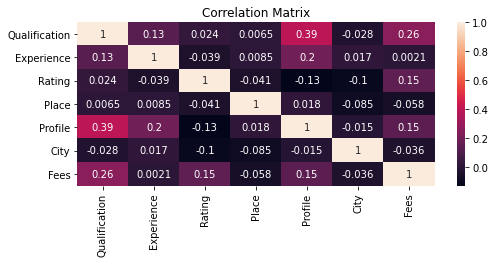

In [335]:
corr_mat=df1.corr()

plt.figure(figsize=[8,3])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

# Outcome of Correlation

We can see the positive and negative correlation with the target column. Here, we can leave the "Encoded" column only because that is not a num variable.

Rating and Experience have a relationship with target column in the dataset.

# Outlier Checking 

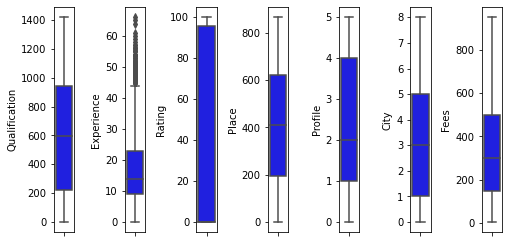

In [336]:
collist=df1.columns.values
ncol=25
nrow=15
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df1[collist[i]],color='blue',orient='v')
    plt.tight_layout()

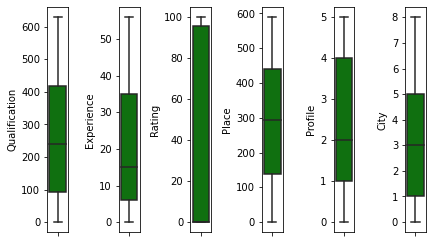

In [337]:
collist=df2.columns.values
ncol=25
nrow=15
plt.figure(figsize=(ncol,2*ncol))
for i in range (0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.boxplot(df2[collist[i]],color='green',orient='v')
    plt.tight_layout()

In the above - we have an outlier in one columns(Experience) which is not near with whisker so
we will rectify in further step

# Checking Skewness

In [338]:
df1.skew()

Qualification    0.239720
Experience       0.991089
Rating           0.247186
Place            0.109516
Profile          0.108803
City             0.009916
Fees             0.751870
dtype: float64

From the above info - we can see the skewness in the dataset only on Experience.

Also, We can consider the -/+.5 is standard

# Data Cleaning

# Removing Outlier

In [339]:
from scipy.stats import zscore
z=np.abs(zscore(df1))
z.shape
threshold=3
print(np.where(z>3))

(array([ 105,  110,  183,  275,  293,  325,  372,  901,  987, 1009, 1111,
       1314, 1631, 1860, 1981, 2023, 2062, 2165, 2202, 2252, 2262, 2281,
       2393, 2428, 2522, 2623, 2631, 2708, 3180, 3365, 3478, 3493, 3608,
       3942, 3960, 4040, 4167, 4212, 4257, 4344, 4581, 4730, 4763, 4775,
       4835, 5195, 5250, 5265, 5277, 5311, 5410, 5422, 5587, 5637, 5664,
       5720, 5807, 5942], dtype=int64), array([1, 1, 1, 6, 6, 1, 1, 1, 6, 1, 1, 6, 6, 1, 1, 1, 1, 6, 1, 6, 1, 1,
       6, 6, 6, 6, 1, 6, 1, 6, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 6, 6, 1, 1,
       6, 6, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))


In [340]:
df_new=df1[(z<3).all(axis=1)]
print(df1.shape)
print(df_new.shape)

(5961, 7)
(5903, 7)


In [341]:
Loss_percentage=(5961-5903)/5961*100
print(Loss_percentage)

0.9729911088743499


We have a 1% data loss in the dataset. Hence, We can proceed with this dataset

In [342]:
X=df1.drop(["Fees"],axis=1)
Y=df1["Fees"]

In [343]:
X.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile', 'City'], dtype='object')

I have removed the target from dataset which is "Fees".

# Data Transform for Remove Skewness

In [346]:
from sklearn.preprocessing import power_transform
DF=power_transform(X,method='yeo-johnson')
DF

array([[-0.26819181,  0.73735682,  1.13268947, -0.30938571,  1.42055919,
         0.48786307],
       [-1.39931855, -0.32517958,  1.12648698,  1.51920803, -1.64414533,
        -1.44919035],
       [ 1.17338557, -0.68837382, -0.89711791,  0.27629077,  0.41883046,
        -1.44919035],
       ...,
       [ 0.1860813 ,  1.76899411,  1.12333174, -0.65817894,  0.94015599,
         0.09836366],
       [ 0.85254844, -0.0134478 ,  1.10015948,  1.47758169,  0.94015599,
         1.18102218],
       [-0.71687243,  0.17358896,  1.13268947,  0.75972902, -0.82224914,
         0.09836366]])

In [347]:
from sklearn.preprocessing import power_transform
DF2=power_transform(df2,method='yeo-johnson')
DF2

array([[ 0.11502176,  0.59975275, -0.9069769 , -0.76520562,  0.90387128,
         1.21053917],
       [ 0.56196288,  0.43138535, -0.9069769 ,  1.48557145,  0.36397158,
         0.87079267],
       [ 0.19737508,  0.82190278,  1.00591541, -0.32339829, -0.22219934,
        -0.82733209],
       ...,
       [ 1.07535349,  1.44716095, -0.9069769 ,  0.79089679,  0.90387128,
        -0.82733209],
       [-1.1531878 , -1.21969931,  1.11531919, -1.73039399, -0.87701584,
        -1.4498984 ],
       [ 0.73991242,  1.42316234, -0.9069769 ,  0.64665901, -0.22219934,
        -0.82733209]])

In [348]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
x=SC.fit_transform(DF)

In [349]:
from sklearn.preprocessing import StandardScaler
SC=StandardScaler()
X=SC.fit_transform(DF2)

# Finding the best Random State for Linear Reqression

In [350]:
from sklearn.svm import SVR
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
scorer = make_scorer(score,greater_is_better=True)
SR = SVR()
SR.fit(x_train,Y_train)
Pred= SR.predict(x_test)
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
score(Pred,Y_test)

0.789311382773328

In [363]:
from sklearn.model_selection import GridSearchCV
parameters = {'C':[0.1,1,10]}
SR2= GridSearchCV(SR,parameters)
SR2.fit(x_train,Y_train)
print(SR2.best_estimator_)

SVR(C=10)


In [364]:
RF=SVR(C=10)
RF.fit(x_train,Y_train)
RF.score(x_train,Y_train)
pred=RF.predict(x_test)
RFS=score(Y_test,pred)
print("R2 Score :",RFS*100)

R2 Score : 79.93514264282724


In [367]:
SR2 = SVR(gamma = 0.1)
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
SR4 = GridSearchCV(SR2,param_grid=parameters,scoring='r2', n_jobs=-1,cv=5)
SR4.fit(x,Y)
pred = SR4.predict(X)
Score_df1 = SR4.predict(x)
print("Training data score {}".format(score(Y, Score_df1)*100))

Training data score 79.96285918876636


# Creating Train-Test Split

In [368]:
x_train,x_test,Y_train,Y_test = train_test_split(x,Y,test_size=.25)

In [369]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)

In [370]:
X_train = SC.fit_transform(x_train)
X_train_2 = poly.fit_transform(x_train)

In [372]:
from sklearn.neighbors import KNeighborsRegressor
KNR = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(2,20)}
reg = GridSearchCV(KNR,parameters,scoring=scorer, n_jobs=-1,cv=5)
reg.fit(x,Y)
ans = reg.predict(x_test)
reg.best_estimator_

KNeighborsRegressor(n_neighbors=19)

In [375]:
KNR = KNeighborsRegressor(n_neighbors=19)
KNR.fit(X_train_2, Y_train)
X_test = SC.transform(x_test)
X_test_2 = poly.transform(x_test)
ans =KNR.predict(X_test_2)
score(ans,Y_test)*100

76.78360607926825

In [376]:
KNR= KNeighborsRegressor(n_neighbors=19)
KNR.fit(x, Y)
ans = KNR.predict(x)
score(ans,Y)

0.8056264564937123

In [379]:
scaler = StandardScaler()
poly = PolynomialFeatures(3)
X = scaler.fit_transform(x)
X_2 = poly.fit_transform(x)
y = df1['Fees']
X_test = scaler.transform(X)
X_test_2 = poly.transform(X)
KNR = KNeighborsRegressor()
parameters = {'n_neighbors':np.arange(2,20)}
reg = GridSearchCV(KNR,param_grid=parameters,scoring=scorer, n_jobs=-1,cv=5)
reg.fit(X_2,y)
ans = reg.predict(X_2)
print("Traing data score {}".format(score(ans,y)*100))

Traing data score 81.5308162910005


# Model Saving

In [384]:
import joblib
filename='Doctor_Consultation.obj'
joblib.dump(SR,open(filename,'wb'))

# Loading Model for Prediction

In [385]:
Loaded_load = joblib.load(open('Doctor_Consultation.obj','rb'))

In [386]:
Conclusion=pd.DataFrame([Loaded_load.predict(X)],index=["Predicted"])
Conclusion

,0,1,2,3,4,5,6,7,8,9,...,5951,5952,5953,5954,5955,5956,5957,5958,5959,5960
Predicted,303.062512,216.638678,309.127096,241.107524,213.507774,191.289342,241.663245,242.083139,290.660166,260.179838,...,236.55321,250.089992,309.858624,268.733428,278.527675,337.60541,258.285349,297.646538,289.278251,233.922176


We have a the outcome for this model